In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

　# 精度
 - t-SNEして得た特徴量でSVM：
 0.64983164983164987
 - t-SNEしてspeciesをグループ化した後でそのグループを当てるようなSVM：
0.68686868686868685
- 前処理なしSVM：
0.0

In [52]:
df = pd.read_csv('data/train.csv')
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [53]:
species = list(set(df.species))
# species

In [54]:
#アルファベット順にする
species.sort()

In [55]:
map_num = np.arange(len(species))

In [56]:
print(len(species))
print(len(map_num))

99
99


In [57]:
# mapping用の辞書を作る。
species_mapping = {species:map_num for (species,map_num) in zip(species,map_num) }

In [58]:
# species_mapping

In [59]:
df[df.species == 'Quercus_Variabilis']

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.000000,...,0.096680,0.0,0.021484,0.000000,0.000000,0.0,0.0,0.0,0.0,0.031250
21,32,Quercus_Variabilis,0.019531,0.029297,0.080078,0.033203,0.025391,0.023438,0.009766,0.005859,...,0.021484,0.0,0.057617,0.000000,0.002930,0.0,0.0,0.0,0.0,0.035156
40,64,Quercus_Variabilis,0.011719,0.023438,0.091797,0.023438,0.013672,0.027344,0.003906,0.000000,...,0.074219,0.0,0.041016,0.000000,0.000000,0.0,0.0,0.0,0.0,0.015625
69,120,Quercus_Variabilis,0.007812,0.011719,0.068359,0.003906,0.015625,0.011719,0.003906,0.000000,...,0.077148,0.0,0.048828,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004883
106,190,Quercus_Variabilis,0.011719,0.017578,0.115230,0.019531,0.015625,0.013672,0.017578,0.003906,...,0.042969,0.0,0.055664,0.000000,0.009766,0.0,0.0,0.0,0.0,0.024414
159,278,Quercus_Variabilis,0.007812,0.013672,0.076172,0.003906,0.019531,0.009766,0.005859,0.000000,...,0.072266,0.0,0.006836,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001953
188,327,Quercus_Variabilis,0.009766,0.015625,0.123050,0.015625,0.017578,0.011719,0.005859,0.000000,...,0.058594,0.0,0.007812,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004883
421,692,Quercus_Variabilis,0.009766,0.017578,0.060547,0.013672,0.009766,0.011719,0.017578,0.000000,...,0.026367,0.0,0.034180,0.000000,0.000000,0.0,0.0,0.0,0.0,0.039062
540,866,Quercus_Variabilis,0.007812,0.015625,0.113280,0.025391,0.015625,0.007812,0.009766,0.005859,...,0.040039,0.0,0.044922,0.000977,0.006836,0.0,0.0,0.0,0.0,0.015625
606,961,Quercus_Variabilis,0.007812,0.013672,0.103520,0.011719,0.011719,0.007812,0.009766,0.001953,...,0.039062,0.0,0.017578,0.000000,0.001953,0.0,0.0,0.0,0.0,0.039062


In [60]:
import cv2

In [61]:
import os
# os.listdir('./data/images/')

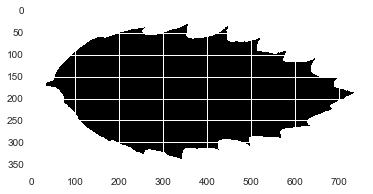

In [62]:
from PIL import Image
im = Image.open('./data/images/7.jpg')
plt.imshow(im)
plt.show()

In [63]:
df.species = df.species.map(species_mapping)

In [64]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [65]:
# t-SNEによる可視化
from sklearn.manifold import TSNE

In [66]:
df_plot = df.drop('id',axis = 1)
df_plot.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [67]:
y = df_plot.loc[:,['species']].values.reshape(-1)

In [68]:
y.shape

(990,)

In [69]:
X = df_plot.drop('species',axis=1).values

In [70]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

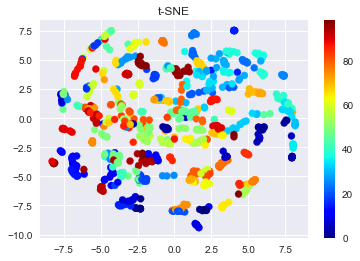

In [71]:
tsne = manifold.TSNE(n_components=2, learning_rate=100,init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,cmap='jet')
plt.colorbar()
plt.title('t-SNE')
plt.show()

In [73]:
from sklearn.cross_validation import train_test_split
X_tsne_train,X_tsne_test,y_train,y_test = train_test_split(X_tsne,y,test_size=0.3,random_state=0)

In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_tsne_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
svc.score(X_tsne_test,y_test)

0.64983164983164987

In [23]:
species

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

speciesをfor文で回して前半をsplit("_")で取り出し、setにする
このインデックスで再度dfをmappingする。

In [24]:
species_head = []
for s in species:
    species_head.append(s.split('_')[0])
species_head = list(set(species_head))

In [25]:
species_head.sort()

In [26]:
species_head

['Acer',
 'Alnus',
 'Arundinaria',
 'Betula',
 'Callicarpa',
 'Castanea',
 'Celtis',
 'Cercis',
 'Cornus',
 'Cotinus',
 'Crataegus',
 'Cytisus',
 'Eucalyptus',
 'Fagus',
 'Ginkgo',
 'Ilex',
 'Liquidambar',
 'Liriodendron',
 'Lithocarpus',
 'Magnolia',
 'Morus',
 'Olea',
 'Phildelphus',
 'Populus',
 'Prunus',
 'Pterocarya',
 'Quercus',
 'Rhododendron',
 'Salix',
 'Sorbus',
 'Tilia',
 'Ulmus',
 'Viburnum',
 'Zelkova']

In [29]:
new_map = []
for s in species:
    head = s.split('_')[0]
    new_map.append(species_head.index(head))

In [30]:
new_species_mapping = {species:new_map for (species,new_map) in zip(species,new_map) }

In [34]:
df = pd.read_csv('data/train.csv')
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [35]:
df.species = df.species.map(new_species_mapping)

In [36]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,25,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,26,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,30,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,26,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [37]:
len(species_head)

34

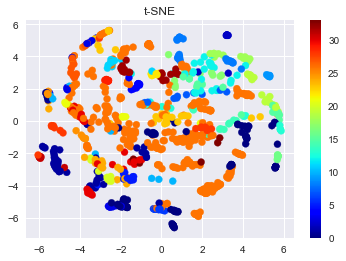

In [40]:
df_plot = df.drop('id',axis = 1)
X = df_plot.drop('species',axis=1).values
y = df_plot.loc[:,['species']].values.reshape(-1)
tsne = manifold.TSNE(n_components=2, learning_rate=50,init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,cmap='jet')
plt.colorbar()
plt.title('t-SNE')
plt.show()

In [43]:
from sklearn.cross_validation import train_test_split
X_tsne_train,X_tsne_test,y_train,y_test = train_test_split(X_tsne,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_tsne_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
svc.score(X_tsne_test,y_test)

0.68686868686868685

In [77]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [83]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
svc.score(X_test,y_test)

0.0

In [85]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [87]:
df.to_csv('./data/mapped_data.csv')